#  逻辑回归

## 五, 逻辑回归

逻辑回归和线性回归有类似之处, 都是利用线性加权计算的模型, 但逻辑回归是分类算法, 例如对是否患癌症进行预测, 因变量就是 **是** 和 **否** ,
两个类别, 自变量可以是年龄, 性别, 饮食, 作息, 病菌感染等, 自变量既可以是数值变量, 也可以是类别变量

### 1, 逻辑回归二分类推导

和线性回归类似, 设自变量为 x, 每个自变量的权重为 w, 令:

$$  
\begin{array}{l}  
z=w_{1} x_{1}+w_{2} x_{2}+\cdots+w_{n} x_{n}+b \  
=\sum_{j=1}^{n} w_{j} x_{j}+b \  
=\sum_{j=0}^{n} w_{j} x_{j} \  
=\vec{w}^{T} \cdot \vec{x}  
\end{array}  
$$

z 是一个连续值, 取值范围(-∞, +∞), 为了实现分类, 一般设置阈值 z = 0, 当 z > 0 时, 将样本判定为一个类别(正例), 该类别设为
1, 当 z ≤ 0 时, 判定为另一个类别(负例), 该类别设为 0, 再设因变量为 y, 从而逻辑回归方程可表示为:

$y=1, z>0$

$y=0, z \leq 0$

上述方程虽然实现了分类, 但提供的信息有限, 因此引入 **sigmoid函数** (也叫 Logistic函数), 将 z 映射到 (0, 1)
区间，可以实现二分类的同时, 还能体现将样本分为某个类的可能性, 这个可能性设为 p:

$$p=\operatorname{sigmoid}(z)=\frac{1}{1+e^{-z}}$$

sigmoid 函数图像如下:

![](/images/mathematical-statistics/sigmoid.png)

于是, 逻辑回归方程又可表示为:

$y=1, p>0.5$

$y=0, 1-p \geq 0.5$

从而可见, 通过比较 p 和 1-p 哪个更大(z 的阈值不取 0 时做出调整即可), 预测结果就是对应的一类

### 2, 逻辑回归的损失函数

通过上述推导过程可知, 要得到逻辑回归模型, 最终就是要求得参数 $\vec{w}^{T}$, 于是将 p 和 1-p 统一, 构造一个损失函数来求
$\vec{w}^{T}$:

$$p(y=1 | x ; w)=s(z)$$

$$p(y=0 | x ; w)=1-s(z)$$

合并:

$$p(y | x ; w)=s(z)^{y}(1-s(z))^{1-y}$$

上式表示一个样本的概率, 我们要求解能够使所有样本联合概率密度最大的 $\vec{w}^{T}$ 值, 根据极大似然估计,
所有样本的联合概率密度函数(似然函数)为:

$$\begin{array}{l}  
L(w)=\prod_{i=1}^{m} p\left(y^{(i)} | x^{(i)} ; w\right) \  
=\prod_{i=1}^{m}
s\left(z^{(i)}\right)^{y^{(i)}}\left(1-s\left(z^{(i)}\right)\right)^{1-y^{(i)}}  
\end{array}$$

取对数, 让累积乘积变累积求和:

$$\begin{array}{l}  
\ln L(w)=\ln \left(\prod_{i=1}^{m}
s\left(z^{(i)}\right)^{y^{(i)}}\left(1-s\left(z^{(i)}\right)^{1-y^{(i)}}\right)\right)
\  
=\sum_{i=1}^{m}\left(y^{(i)} \ln s\left(z^{(i)}\right)+\left(1-y^{(i)}\right)
\ln \left(1-s\left(z^{(i)}\right)\right)\right)  
\end{array}$$

要求上式最大值, 取反变成求最小值, 就作为逻辑回归的损失函数(交叉熵损失函数):

$$J(w)=-\sum_{i=1}^{m}\left(y^{(i)} \ln
s\left(z^{(i)}\right)+\left(1-y^{(i)}\right) \ln
\left(1-s\left(z^{(i)}\right)\right)\right)$$

利用梯度下降法最终求得 $\vec{w}^{T}$ (省略)

例, 对鸢尾花实现二分类并分析:

In [11]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split  
from sklearn.datasets import load_iris  
import warnings  

warnings.filterwarnings('ignore')  

iris = load_iris()  
x, y = iris.data, iris.target  

# 鸢尾花数据集有 3 个类别, 4 个特性, 取两个类别, 两个特性  
x = x[y!=0, 2:]  
y = y[y!=0]  

# 拆分训练集与测试集  
x_train, x_test, y_train, y_test = train_test_split(x, y,  
        test_size=0.25, random_state=2)  

# 训练分类模型  
lr = LogisticRegression()  
lr.fit(x_train, y_train)  

# 测试  
y_hat = lr.predict(x_test)  
print('权重:', lr.coef_)  
print('偏置:', lr.intercept_)  
print('真实值:', y_test)  
print('预测值:', y_hat)  

权重: [[2.54536368 2.15257324]]
偏置: [-16.08741502]
真实值: [2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2]
预测值: [2 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2]


---|---  


权重: [[2.54536368 2.15257324]]
偏置: [-16.08741502]
真实值: [2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2]
预测值: [2 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 1 2 1 2]


1  
2  
3  
4  
5  
6  
7  
8  
9  
10  
11  
12  
13  
14  
15  
16  


|

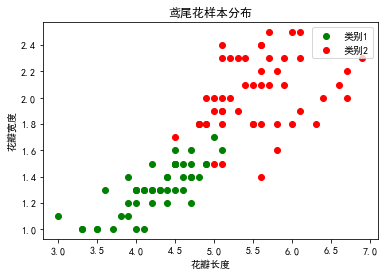

In [12]:
# 样本的真实类别可视化  
import matplotlib.pyplot as plt  
plt.rcParams['font.family'] = 'SimHei'  

# 取出两种鸢尾花的特征  
c1 = x[y==1]  
c2 = x[y==2]  

# 绘制样本分布  
plt.scatter(x=c1[:, 0], y=c1[:, 1], c='g', label='类别1')  
plt.scatter(x=c2[:, 0], y=c2[:, 1], c='r', label='类别2')  
plt.xlabel('花瓣长度')  
plt.ylabel('花瓣宽度')  
plt.title('鸢尾花样本分布')  
plt.legend()  
plt.show()  

---|---  

![](/images/mathematical-statistics/output_2_0.png)



1  
2  
3  
4  
5  
6  
7  
8  
9  


|

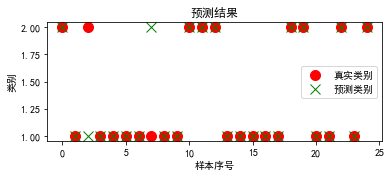

In [13]:
# 将预测类别和真实类别可视化对比  
plt.figure(figsize=(6, 2.2))  
plt.plot(y_test, marker='o', ls='', ms=10, c='r', label='真实类别')  
plt.plot(y_hat, marker='x', ls='', ms=10, c='g', label='预测类别')  
plt.xlabel('样本序号')  
plt.ylabel('类别')  
plt.title('预测结果')  
plt.legend()  
plt.show()  

---|---  

![](/images/mathematical-statistics/output_3_0.png)



1  
2  
3  
4  
5  
6  
7  
8  
9  
10  
11  
12  
13  
14  
15  
16  
17  
18  
19  
20  
21  
22  
23  
24  
25  


|

概率:
[[0.46933862 0.53066138]
 [0.98282882 0.01717118]
 [0.72589695 0.27410305]
 [0.91245661 0.08754339]
 [0.80288412 0.19711588]]


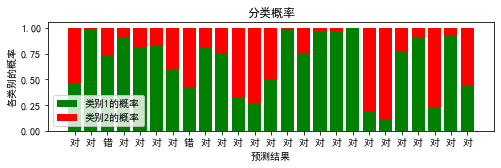

In [14]:
# 因预测样本所属类别时, 通过比较概率得到结果,   
# 我们可将结果对应的概率可视化  
import numpy as np  

# 获取预测的概率值  
probability = lr.predict_proba(x_test)  
print('概率:', probability[:5], sep='\n')  

index = np.arange(len(x_test))  
pro_0 = probability[:, 0]  
pro_1 = probability[:, 1]  

# 设置预测结果标签, 对和错  
tick_label = np.where(y_test==y_hat, '对', '错')  

# 绘制堆叠图  
plt.figure(figsize=(8, 2))  
plt.bar(index, height=pro_0, color='g', label='类别1的概率')  
plt.bar(index, height=pro_1, color='r', bottom=pro_0,  
        label='类别2的概率', tick_label=tick_label)  
plt.xlabel('预测结果')  
plt.ylabel('各类别的概率')  
plt.title('分类概率')  
plt.legend()  
plt.show() 

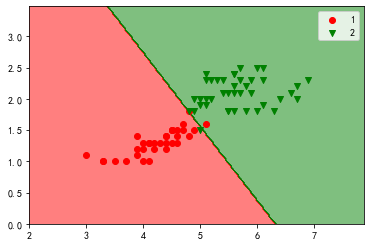

In [15]:
# 绘制决策边界  
# 决策边界: 不同类别的分界线  
from matplotlib.colors import ListedColormap  

# 定义绘制函数  
def plot_decision_boundary(model, x, y):  
    color = ['r', 'g', 'b']  
    marker = ['o', 'v', 'x']  
    class_label = np.unique(y)  
    cmap = ListedColormap(color[:len(class_label)])  
    x1_min, x2_min = np.min(x, axis=0)  
    x1_max, x2_max = np.max(x, axis=0)  
    x1 = np.arange(x1_min - 1, x1_max + 1, 0.02)  
    x2 = np.arange(x2_min - 1, x2_max + 1, 0.02)  
    x1, x2 = np.meshgrid(x1, x2)  
    z = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)  

    plt.contourf(x1, x2, z, cmap=cmap, alpha=0.5)  
    for i, class_ in enumerate(class_label):  
        plt.scatter(x=x[y==class_, 0], y=x[y==class_, 1],  
                c=cmap.colors[i], label=class_, marker=marker[i])  
    plt.legend()  
    plt.show()  

# 绘制模型在训练集上的决策边界  
plot_decision_boundary(lr, x_train, y_train)  

**拓展** :  
逻辑回归实现多分类

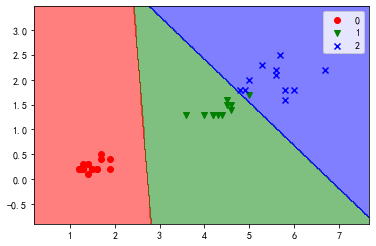

In [16]:
iris = load_iris()  
x, y = iris.data, iris.target  
x = x[:, 2:]  
x_train, x_test, y_train, y_test = train_test_split(x, y,   
        test_size=0.25, random_state=2)  
lr = LogisticRegression()  
lr.fit(x_train, y_train)  

# 测试分类  
y_hat = lr.predict(x_test)  

# 可视化结果  
plt.rcParams['axes.unicode_minus']=False  
plot_decision_boundary(lr, x_test, y_test)  